## libraries

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## short variable description
* **date**: Date in MM-DD-YYYY format.
* **day**: Day of the week.
* **quarter**: Segment of the month divided into four quarters.
* **department**: Relevant department associated with the instance.
* **team_no**: Specific team number associated with the instance.
* **no_of_workers**: Quantity of workers in each team.
* **no_of_style_change**: Number of style alterations for a specific product.
* **targeted_productivity**: Planned productivity established by the authority for * each team per day.  
* **smv**: Standard Minute Value, indicating the allocated time for a task.
* **wip**: Work in progress, encompassing the quantity of unfinished items for products.
* **over_time**: Reflects the overtime duration by each team, measured in minutes.
* **incentive**: Represents the monetary incentive (in BDT) intended to encourage specific actions. 
* **idle_time**: Duration of time when production was interrupted due to various reasons.
* **idle_men**: Number of workers rendered idle due to production interruptions.
* **actual_productivity**: The actual percentage of productivity achieved by workers, ranging from 0 to 1.

In [24]:
#df = pd.read_csv('/Users/irenaz/Desktop/Masters - DSBA/SEM4/CONSULTING/project/DS2-Consulting/data/garments_worker_productivity.csv')
df = pd.read_csv('/Users/polaparol/Documents/DS-sem4/consulting/productivity.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [25]:
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [26]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [27]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [28]:
df.duplicated().sum() # no duplicates

0

In [29]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [30]:
#df = pd.get_dummies(df, columns=['quarter'], prefix='quarter')
#df.rename(columns = {'quarter_Quarter1':'quarter1','quarter_Quarter2':'quarter2', 'quarter_Quarter3':'quarter3', 'quarter_Quarter4':'quarter4', 'quarter_Quarter5':'quarter5' }, inplace = True)
#df.drop('quarter5', axis=1, inplace=True)

In [31]:
df['day'] = pd.to_datetime(df['date']).apply(lambda x: x.day)
df['month'] = pd.to_datetime(df['date']).apply(lambda x: x.month)
df['num_week'] = pd.to_datetime(df['date']).apply(lambda x: x.weekofyear)
df.drop(['date'], axis=1, inplace=True)

In [32]:
df.sample(10)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,num_week
558,Quarter1,sweing,1,8,0.60,24.26,1196.0,6600,0,0.0,0,0,55.0,0.466821,2,5
1188,Quarter2,sweing,11,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557,3,11
17,Quarter1,sweing,1,4,0.65,23.69,861.0,7200,0,0.0,0,0,60.0,0.521180,1,1
452,Quarter4,sweing,26,12,0.70,15.26,1337.0,6120,40,0.0,0,0,34.0,0.700437,1,5
965,Quarter4,finishing,28,5,0.80,4.60,NaN,7560,0,0.0,0,0,18.0,0.921605,2,9
193,Quarter2,finishing,12,1,0.80,3.94,NaN,1440,0,0.0,0,0,8.0,0.955152,1,3
398,Quarter4,finishing,24,11,0.75,4.15,NaN,1800,0,0.0,0,0,10.0,0.896023,1,4
271,Quarter3,finishing,15,7,0.80,2.90,NaN,1440,0,0.0,0,0,8.0,0.689299,1,3
835,Quarter3,sweing,18,9,0.70,18.79,1587.0,4560,30,0.0,0,1,51.0,0.700096,2,8
896,Quarter4,sweing,23,3,0.70,29.40,1228.0,6960,30,0.0,0,2,58.0,0.700362,2,9


                            day      team  targeted_productivity       smv  \
day                    1.000000  0.018423              -0.113448  0.001263   
team                   0.018423  1.000000               0.030274 -0.110011   
targeted_productivity -0.113448  0.030274               1.000000 -0.069489   
smv                    0.001263 -0.110011              -0.069489  1.000000   
wip                   -0.105402 -0.033474               0.062054 -0.037837   
over_time              0.029768 -0.096737              -0.088557  0.674887   
incentive             -0.043032 -0.007674               0.032768  0.032629   
idle_time             -0.045663  0.003796              -0.056181  0.056863   
idle_men              -0.022035  0.026974              -0.053818  0.105901   
no_of_style_change     0.186703 -0.011194              -0.209294  0.315388   
no_of_workers         -0.004733 -0.075113              -0.084288  0.912176   
actual_productivity   -0.050249 -0.148753               0.421594

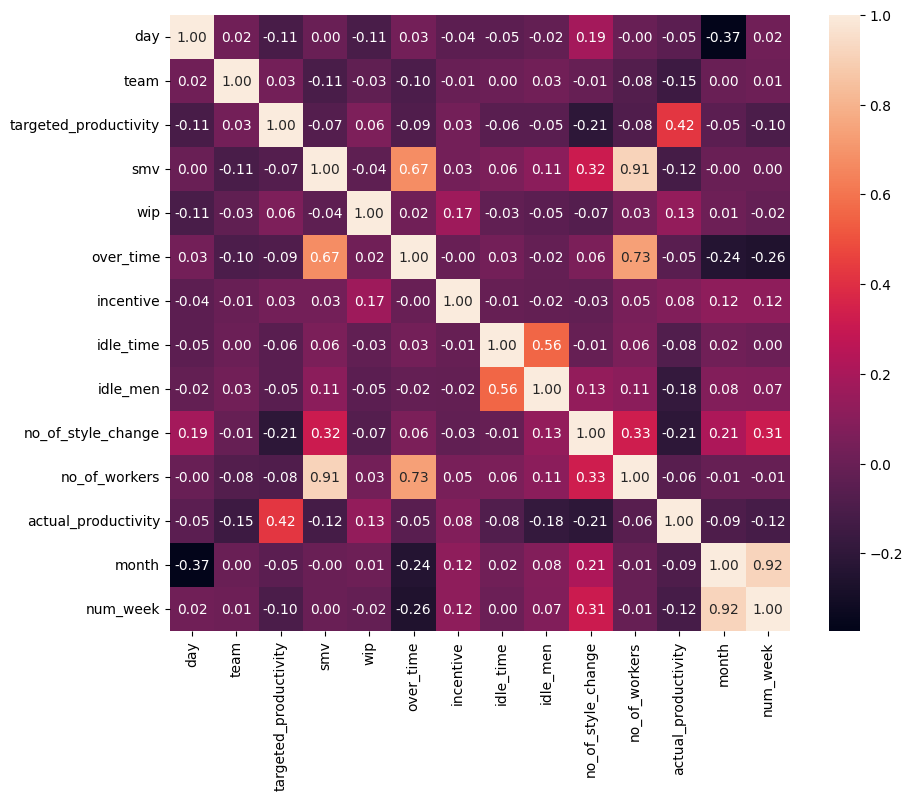

In [33]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

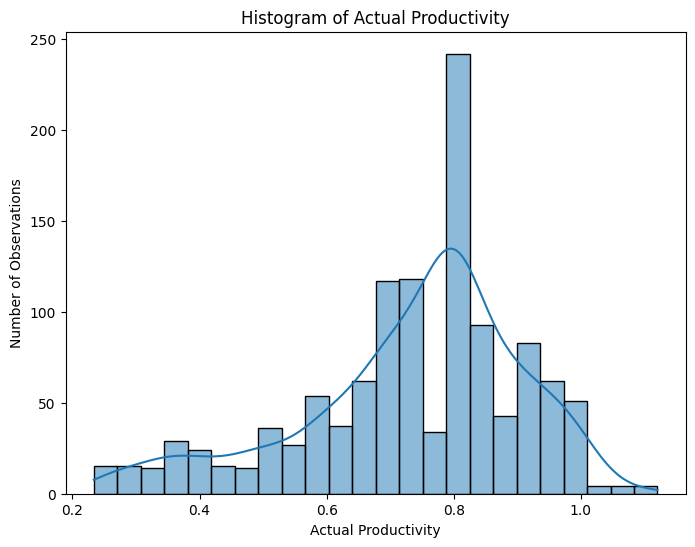

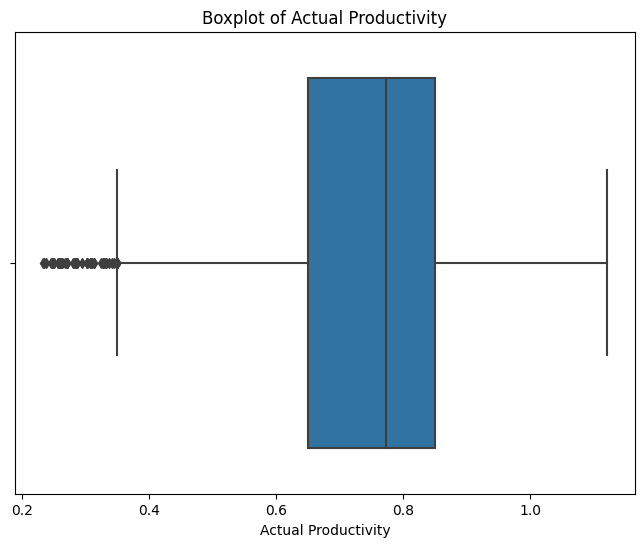

In [34]:
# Histogram of Actual Productivity
plt.figure(figsize=(8, 6))
sns.histplot(df['actual_productivity'], kde=True)
plt.title('Histogram of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Number of Observations')
plt.show()

# Boxplot of Actual Productivity
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['actual_productivity'])
plt.title('Boxplot of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.show()